<a href="https://colab.research.google.com/github/Israilov19/-/blob/main/IsrailovEldar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [89]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test,y_test) = mnist.load_data()

In [65]:
print(x_train.shape)
print(x_test.shape)


(60000, 28, 28)
(10000, 28, 28)


In [66]:

x_train = x_train/255
x_test = x_test/255

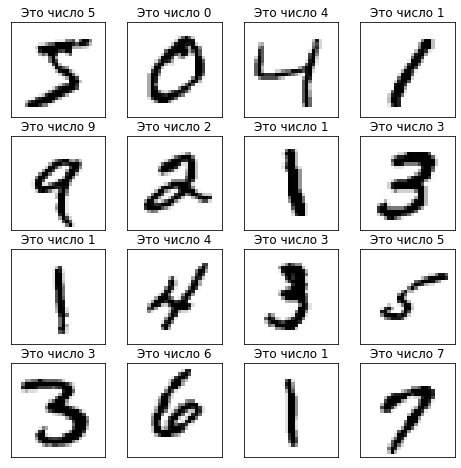

In [67]:
plt.figure(figsize=(8,8))
for i in range(16):
  plt.subplot(4,4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap =plt.cm.binary)
  plt.title("Это число {}".format(y_train[i]))

В данном фрагменте представлено распознование цифр с помощью полносвязных сетей

In [68]:
model1 = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28,1)),
      tf.keras.layers.Dense(128, activation = tf.nn.sigmoid),
      tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [69]:
model1.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [70]:
Model1 = model1.fit(x_train,y_train,batch_size=32, epochs=6, validation_split=0.2)

Epoch 1/6
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7373 - accuracy: 0.8154 - val_loss: 0.2406 - val_accuracy: 0.9336
Epoch 2/6
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2319 - accuracy: 0.9332 - val_loss: 0.1835 - val_accuracy: 0.9482
Epoch 3/6
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1718 - accuracy: 0.9494 - val_loss: 0.1527 - val_accuracy: 0.9568
Epoch 4/6
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1363 - accuracy: 0.9601 - val_loss: 0.1300 - val_accuracy: 0.9625
Epoch 5/6
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1089 - accuracy: 0.9686 - val_loss: 0.1166 - val_accuracy: 0.9672
Epoch 6/6
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0877 - accuracy: 0.9750 - val_loss: 0.1080 - val_accuracy: 0.9672


In [71]:
print(model1.evaluate(x_test,y_test))

313/313 [==============================] - 1s 1ms/step - loss: 0.1010 - accuracy: 0.9696
[0.10097921639680862, 0.9696000218391418]


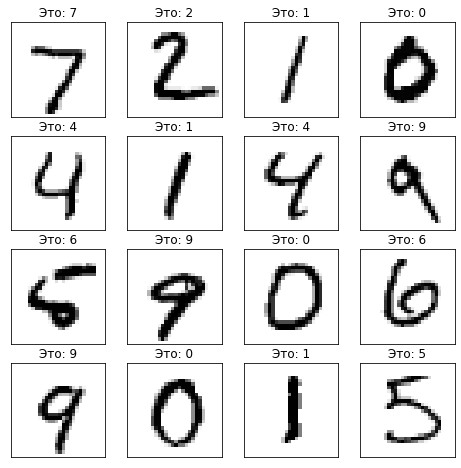

In [72]:
plt.figure(figsize=(8,8))
for i in range(16):
  plt.subplot(4,4, i+1)
  plt.xticks([])
  plt.yticks([])
  x = np.expand_dims(x_test[i], axis = 0)
  res = model1.predict(x)

  plt.imshow(x_test[i], cmap=plt.cm.binary)
  plt.title(f"Это: {np.argmax(res)}")

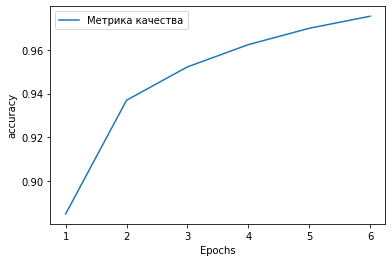

In [73]:
accu_values = Model1.history['accuracy']
epochs = range(1,len(accu_values) + 1)
plt.plot(epochs,accu_values,label = 'Метрика качества')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

График метрики


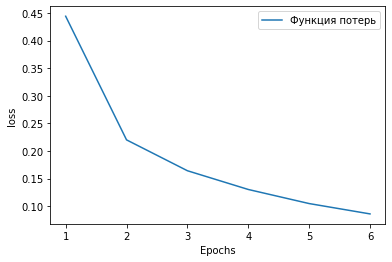

In [74]:
accu_values = Model1.history['loss']
epochs = range(1,len(accu_values) + 1)
plt.plot(epochs,accu_values,label = 'Функция потерь')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

График функции потерь 

НЕЙРОНКА НА СВЁРТОЧНЫХ СЕТЯХ


In [75]:
model2 =  tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), filters=32, kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.sigmoid),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [76]:
model2.compile(
    optimizer = 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

In [77]:
Model2 = model2.fit(x_train.reshape(-1, 28, 28, 1),y_train, batch_size=64, epochs=6, validation_split=0.2)

Epoch 1/6
750/750 [==============================] - 41s 55ms/step - loss: 0.4529 - accuracy: 0.8658 - val_loss: 0.0942 - val_accuracy: 0.9732
Epoch 2/6
750/750 [==============================] - 40s 54ms/step - loss: 0.0770 - accuracy: 0.9771 - val_loss: 0.0617 - val_accuracy: 0.9823
Epoch 3/6
750/750 [==============================] - 40s 54ms/step - loss: 0.0451 - accuracy: 0.9869 - val_loss: 0.0590 - val_accuracy: 0.9833
Epoch 4/6
750/750 [==============================] - 40s 54ms/step - loss: 0.0305 - accuracy: 0.9905 - val_loss: 0.0525 - val_accuracy: 0.9836
Epoch 5/6
750/750 [==============================] - 41s 54ms/step - loss: 0.0213 - accuracy: 0.9940 - val_loss: 0.0496 - val_accuracy: 0.9860
Epoch 6/6
750/750 [==============================] - 41s 55ms/step - loss: 0.0139 - accuracy: 0.9962 - val_loss: 0.0553 - val_accuracy: 0.9851


In [78]:
print(model2.evaluate(x_test.reshape(-1, 28, 28, 1),y_test))

313/313 [==============================] - 3s 10ms/step - loss: 0.0476 - accuracy: 0.9836
[0.047633424401283264, 0.9836000204086304]


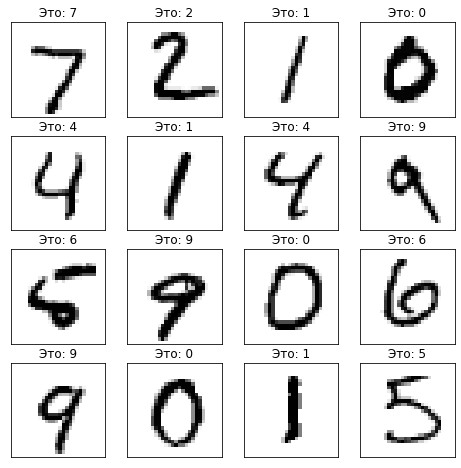

In [79]:
plt.figure(figsize=(8,8))
for i in range(16):
  plt.subplot(4,4, i+1)
  plt.xticks([])
  plt.yticks([])
  x = np.expand_dims(x_test[i], axis = 0)
  res = model2.predict(x.reshape(-1, 28, 28, 1))

  plt.imshow(x_test[i], cmap=plt.cm.binary)
  plt.title(f"Это: {np.argmax(res)}")

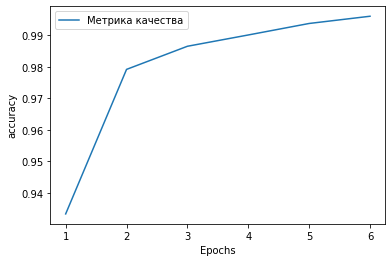

In [80]:
accu_values = Model2.history['accuracy']
epochs = range(1,len(accu_values) + 1)
plt.plot(epochs,accu_values,label = 'Метрика качества')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

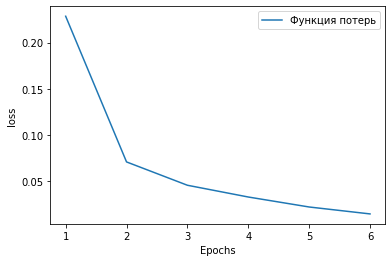

In [81]:
accu_values = Model2.history['loss']
epochs = range(1,len(accu_values) + 1)
plt.plot(epochs,accu_values,label = 'Функция потерь')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [82]:
model3 =  tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), filters=32, kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D( filters=64, kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [83]:
model3.compile(
    optimizer = 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

In [84]:
Model3 = model3.fit(x_train.reshape(-1, 28, 28, 1),y_train, batch_size=32, epochs=6, validation_split=0.2)

Epoch 1/6
1500/1500 [==============================] - 65s 43ms/step - loss: 0.3009 - accuracy: 0.9064 - val_loss: 0.0574 - val_accuracy: 0.9822
Epoch 2/6
1500/1500 [==============================] - 65s 43ms/step - loss: 0.0528 - accuracy: 0.9831 - val_loss: 0.0409 - val_accuracy: 0.9877
Epoch 3/6
1500/1500 [==============================] - 65s 43ms/step - loss: 0.0337 - accuracy: 0.9890 - val_loss: 0.0408 - val_accuracy: 0.9882
Epoch 4/6
1500/1500 [==============================] - 65s 43ms/step - loss: 0.0269 - accuracy: 0.9914 - val_loss: 0.0370 - val_accuracy: 0.9906
Epoch 5/6
1500/1500 [==============================] - 65s 43ms/step - loss: 0.0214 - accuracy: 0.9933 - val_loss: 0.0508 - val_accuracy: 0.9858
Epoch 6/6
1500/1500 [==============================] - 65s 43ms/step - loss: 0.0169 - accuracy: 0.9948 - val_loss: 0.0387 - val_accuracy: 0.9899


In [85]:
print(model3.evaluate(x_test.reshape(-1, 28, 28, 1),y_test))

313/313 [==============================] - 4s 12ms/step - loss: 0.0300 - accuracy: 0.9905
[0.02998385950922966, 0.9904999732971191]


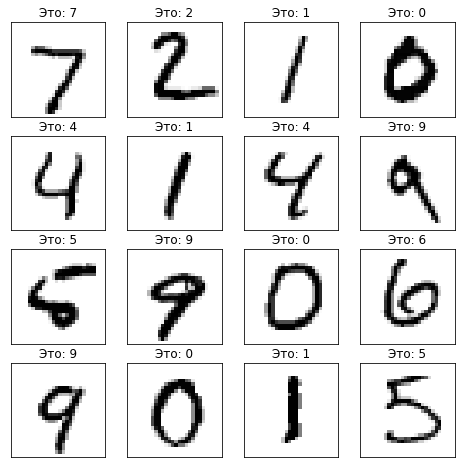

In [86]:
plt.figure(figsize=(8,8))
for i in range(16):
  plt.subplot(4,4, i+1)
  plt.xticks([])
  plt.yticks([])
  x = np.expand_dims(x_test[i], axis = 0)
  res = model3.predict(x.reshape(-1, 28, 28, 1))

  plt.imshow(x_test[i], cmap=plt.cm.binary)
  plt.title(f"Это: {np.argmax(res)}")

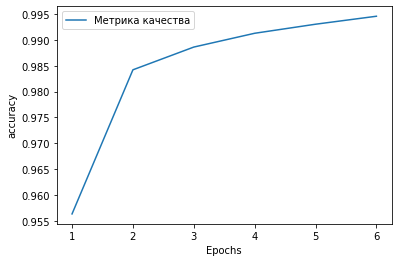

In [87]:
accu_values = Model3.history['accuracy']
epochs = range(1,len(accu_values) + 1)
plt.plot(epochs,accu_values,label = 'Метрика качества')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

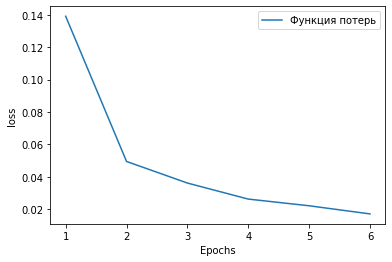

In [88]:
accu_values = Model3.history['loss']
epochs = range(1,len(accu_values) + 1)
plt.plot(epochs,accu_values,label = 'Функция потерь')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()